# Graph Theory Questions for Jupyter-based Exam

## Instructions
1. You may use any source of information you can find, so long as you don't communicate with anyone else.
2. You can put your answers in the marked cells. If you prefer making multiple answer cells that's also ok, but make sure I know which question you're answering where.
3. You can split up code answers into multiple cells if you like, but keep them in order for me to grade!
3. You get partial points for partial answers. This means you can still get points for coding questions if you explain your reasoning, but don't manage the code itself.
4. You have 90 minutes total for the exam (unless you are eligible for "Special Facilities"), distribute it wisely amongst questions.
5. Remember you can look up the documentation of any function or object by appending "?" (question mark) to it without calling it with "()"; this is the same documentation as you'd look up on the internet! See an example in the next cell.
4. Unless specified otherwise you may assume graphs are simple and undirected.
6. Your final grade will be `score / 70 * 9 + 1`


In [3]:
nx.Graph?

# -- BEGIN EXAM --
Good luck!
*Don't forget to run the global imports defined in the next cell!!!*

In [2]:
# Global definitions you will need are here; RUN THIS CELL
# Define any extra global modules you want to add yourself here as well!
# As well as any extra helper functions you want to use in all exercises below.
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 (10pt)

Answer the following questions.

1. What is the definition of the chromatic number of a graph? Give a non-trivial[1] example.
1. What is the definition of a bipartite graph? Give a non-trivial[1] example.
1. What is the chromatic number of a bipartite graph?
1. What is the chromatic number of a $K_n$ complete graph?
1. What is the chromatic number of a cycle graph of size $n$?
1. What is the chromatic number of a graph containing a clique of size $n$?
1. Explain in your own words what the following means. What is X?
   > Sets $A_1, A_2, ..., A_n$ are called X if and only if $A_i \cap A_j = \emptyset \forall i \neq j$

[1] For example, the chromatic number of a graph without any edges is too simple.

In [4]:
## Answers to question 1
#1 the minimal number of colours needed to colour the vertices in such a way that no two adjacent vertices have the same colour
#2 it is a set of graph vertices decomposed into two disjoint sets such that no two graph vertices within the same set are adjacent.
#3 2
#4. n
#5 3 if n is odd 2 otherwise
#6 If a graph contains a clique of size k, then at least k colors are required to color just the clique. Thus, the chromatic number is at least k
#7 X - a set (multiset) of disjoint sets. The definition means that the intersection of disjoint sets is an empty set


## Question 2 (20pt)

Some proteins can adopt multiple conformations and transition between these conformations. You can describe these kind of systems using directed graphs. Nodes will be the conformations, and edges the transitions between these conformations. Some of these conformations will be more stable than others, and transitions between these conformations will not be arbitrary. For example, a transition from an alpha-helical conformation to a coil conformation will be more likely than a transition from an alpha-helical conformation directly to a beta-sheet conformation. These transition probablities can be expressed as floating point numbers between 0 and 1, where this probability expresses the proportion of protein that undergoes that transition in a time step. 

Given the following system, consider the following example (You can find the networkx digraph in the following cell).

| Transition | Probability |
|------------|-------------|
| A -> A     | 0.49        |
| A -> B     | 0.01        |
| A -> C     | 0.5         |
| B -> A     | 0.01        |
| B -> B     | 0.3         |
| B -> C     | 0.69        |
| C -> A     | 0.65        |
| C -> B     | 0.3         |
| C -> C     | 0.05        |


| Time || A | B | C |
|------||---|---|---|
|0||0.30|0.40|0.30|
|1||0.35|0.21|0.44|
|2||0.46|0.20|0.34|
|3||0.45|0.17|0.38|
|4||0.47|0.17|0.36|
|5||0.47|0.16|0.37|
|6||0.47|0.16|0.36|
|7||0.47|0.16|0.37|

At $t=0$ 0.3 of the population is A, 0.4 is B, and 0.3 is C. Each time step 50% of A, 69% of B, and 5% of C is transformed to C. So, at $t=1$ C has become $0.5*0.3 + 0.69*0.4 + 0.05*0.3 = 0.441$. What you can see is that after about 4 steps a stable state is reached, where 0.47 of the population is A, 0.16 is B, and 0.37 is C, and this distribution does not change any more.

An interesting question you can ask for these kind of systems is what the distribution is between the separate conformations after an inifinite amount of time.

For all the following questions you can calculate the answer by hand, code up an universal solution, or even determine the answer with just reasoning. Explain your answer in all cases though!

Hint: If you choose to calculate a stable state you may assume the stable state will be reached after 100 steps.

1. Given a transition digraph with two nodes and edge weights of A->B=0.3 and B->A=0.7, what is the stable state after $\infty$ time?
2. You're given a digraph G containing a node $v_0$. $v_0$ has an out-degree of 0 and an in-degree of 1. In addition, the induced subgraph $G \setminus v_0$ (G with node $v_0$ removed) is strongly connected. What is the stable state after $\infty$ time? Why is it important to mention $G \setminus v_0$ is strongly connected?
3. The sum of the weighted out-degree of nodes in a transition digraphs should be normalized to 1. Why?
4. Load the digraph from the file `transition_graph.edgelist` (which is in edge list format: the first two columns are node indices, the third column is the transition probability), and determine the stable state. 

[('A', 0.35), ('B', 0.21), ('C', 0.44)]
[('A', 0.46), ('B', 0.2), ('C', 0.34)]
[('A', 0.45), ('B', 0.17), ('C', 0.38)]
[('A', 0.47), ('B', 0.17), ('C', 0.36)]
[('A', 0.47), ('B', 0.16), ('C', 0.37)]
[('A', 0.47), ('B', 0.16), ('C', 0.36)]
[('A', 0.47), ('B', 0.16), ('C', 0.37)]
[('A', 0.47), ('B', 0.16), ('C', 0.37)]
[('A', 0.47), ('B', 0.16), ('C', 0.37)]
[('A', 0.47), ('B', 0.16), ('C', 0.37)]


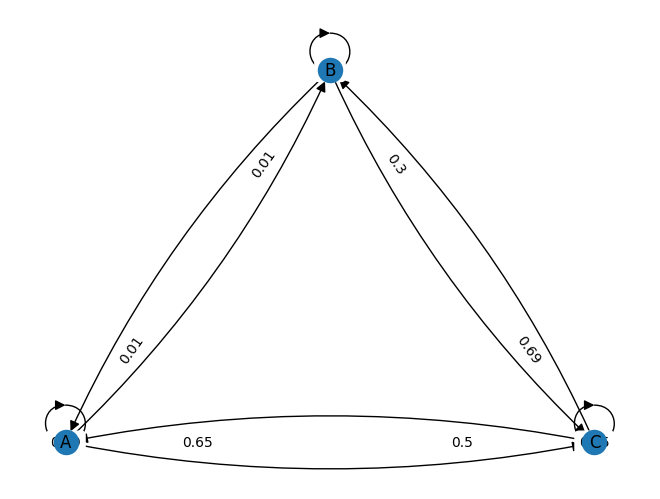

In [36]:
# Here's the digraph from the example.
transition_graph = nx.DiGraph()
transition_graph.add_edges_from([
    ('A', 'A', {'weight': 0.49}),
    ('A', 'B', {'weight': 0.01}),
    ('A', 'C', {'weight': 0.5}),
    ('B', 'A', {'weight': 0.01}),
    ('B', 'B', {'weight': 0.3}),
    ('B', 'C', {'weight': 0.69}),
    ('C', 'A', {'weight': 0.65}),
    ('C', 'B', {'weight': 0.3}),
    ('C', 'C', {'weight': 0.05}),
])
layout = {'A': (0, 0), 'B': (0.5, 1), 'C': (1, 0)}
weights = nx.get_edge_attributes(transition_graph, 'weight')
nx.draw(transition_graph, pos=layout, with_labels=True, connectionstyle='arc3,rad=0.1', arrowsize=15)
nx.draw_networkx_edge_labels(transition_graph, 
                             pos=layout, 
                             edge_labels=weights,
                             verticalalignment='center',
                             label_pos=0.25);

population = {'A': 0.3, 'B': 0.4, 'C': 0.3}
for i in range(10):
    new_states = {}
    for node in transition_graph.nodes:
        new_state = 0
        for node2 in transition_graph.nodes:
            new_state += population[node2]*transition_graph.edges[(node2, node)]['weight']
        new_states[node] = new_state
    population = new_states
    print([(val,round(key, 2)) for val,key in population.items()])


In [51]:
## Answers to Question 2
transition_graph = nx.DiGraph()
transition_graph.add_edges_from([
    ('A', 'B', {'weight': 0.3}),
    ('A', 'A', {'weight': 0.7}),
    ('B', 'A', {'weight': 0.7}),
    ('B', 'B', {'weight': 0.3}),
])
print(transition_graph.edges(data=True))
population = {'A': 0.5, 'B': 0.5}

print("step 0 ", population)
for i in range(10):
    new_states = {}
    for node in transition_graph.nodes:
        new_state = 0
        for node2 in transition_graph.nodes:
            if transition_graph.has_edge(node2, node):
                new_state += population[node2]*transition_graph.edges[(node2, node)]['weight']
        new_states[node] = new_state
    population = new_states
    print("step ", i+1, " ", [(val,round(key, 2)) for val,key in population.items()])
    
# 1.stable state is ('A', 0.7), ('B', 0.3) after first step given the poplulation 0.5,0.5
# 2. maybe (0, 0, 0, 1, 0) where 1 is the population of v0 node in the stable state. It is important to mention that G/v0 is strongly connected because it means that any node will end up conversioning to the v0 node.
# 3. because we work with the probability of transition. The sum of probabilities of all possible events is 1.


    


[('A', 'B', {'weight': 0.3}), ('A', 'A', {'weight': 0.7}), ('B', 'A', {'weight': 0.7}), ('B', 'B', {'weight': 0.3})]
step 0  {'A': 0.5, 'B': 0.5}
step  1   [('A', 0.7), ('B', 0.3)]
step  2   [('A', 0.7), ('B', 0.3)]
step  3   [('A', 0.7), ('B', 0.3)]
step  4   [('A', 0.7), ('B', 0.3)]
step  5   [('A', 0.7), ('B', 0.3)]
step  6   [('A', 0.7), ('B', 0.3)]
step  7   [('A', 0.7), ('B', 0.3)]
step  8   [('A', 0.7), ('B', 0.3)]
step  9   [('A', 0.7), ('B', 0.3)]
step  10   [('A', 0.7), ('B', 0.3)]


In [63]:
transition_graph = nx.DiGraph()

with open('transition_graph(1).edgelist') as infile:
    for line in infile:
        edges = line.strip().split(' ')
        transition_graph.add_edges_from([(edges[0], edges[1], {'weight': float(edges[2])})])
population = {}
for node in transition_graph.nodes:
    population[node] = 100/len(transition_graph.nodes)
# print(transition_graph.edges(data=True))
    
print("step 0 ", population)
for i in range(10):
    new_states = {}
    for node in transition_graph.nodes:
        new_state = 0
        for node2 in transition_graph.nodes:
            if transition_graph.has_edge(node2, node):
                new_state += population[node2]*transition_graph.edges[(node2, node)]['weight']
        new_states[node] = new_state
    population = new_states
    print("step ", i+1, " ", [(val,round(key, 2)) for val,key in population.items()])
    
# the stable state is [('0', 7.81), ('1', 10.97), ('5', 7.95), ('7', 8.05), ('8', 16.67), ('2', 10.35), ('3', 12.54), ('9', 8.49), ('6', 11.08), ('4', 6.1)]


step 0  {'0': 10.0, '1': 10.0, '5': 10.0, '7': 10.0, '8': 10.0, '2': 10.0, '3': 10.0, '9': 10.0, '6': 10.0, '4': 10.0}
step  1   [('0', 8.45), ('1', 12.56), ('5', 8.92), ('7', 8.08), ('8', 15.92), ('2', 12.22), ('3', 11.28), ('9', 6.07), ('6', 10.11), ('4', 6.38)]
step  2   [('0', 8.7), ('1', 10.89), ('5', 8.15), ('7', 8.77), ('8', 15.87), ('2', 10.7), ('3', 12.28), ('9', 8.39), ('6', 10.2), ('4', 6.05)]
step  3   [('0', 8.1), ('1', 11.28), ('5', 8.02), ('7', 8.33), ('8', 16.46), ('2', 10.36), ('3', 12.48), ('9', 8.21), ('6', 10.67), ('4', 6.09)]
step  4   [('0', 7.95), ('1', 11.0), ('5', 7.95), ('7', 8.18), ('8', 16.56), ('2', 10.38), ('3', 12.52), ('9', 8.48), ('6', 10.87), ('4', 6.11)]
step  5   [('0', 7.85), ('1', 11.02), ('5', 7.96), ('7', 8.1), ('8', 16.63), ('2', 10.34), ('3', 12.54), ('9', 8.46), ('6', 11.0), ('4', 6.11)]
step  6   [('0', 7.83), ('1', 10.98), ('5', 7.95), ('7', 8.07), ('8', 16.65), ('2', 10.35), ('3', 12.54), ('9', 8.49), ('6', 11.04), ('4', 6.1)]
step  7   [('

## Question 3 (20 pt)

A sports club had an internal dispute, and is split into two. People who are friends joined the same, new, club. For all the members of both clubs researchers tracked how often they interact outside of the sports club.

1. Load in the graph in the file `karate_club.graphml`. If you don't manage to read in this file, use the following snippet of code: `graph = nx.karate_club_graph()` (doing this means you will get 0 points for this subquestion). This graph is annotated in two ways: each node has a `"club"` attribute describing which new club they joined (either 'Officer' or 'Mr. Hi'); additionally, each edge has a `"weight"` attribute, describing how often two people interact outside of the club. 
2. Assume the teachers of the new clubs are the most social/central. Identify the two new teachers. Which method(s) did you use, and why? If you don't manage, continue with nodes 4 and 24 as teachers to gain 0 points on this subquestion.
3. For both teachers, calculate the average distance between the teacher and their students, and between the teacher and members of the other club. Does this match your expectations? Plot the distances between teachers and students as 4 histograms.
4. Some members had difficulties choosing which club to join. Who?

[0]
[11, 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 4, 10, 19, 24, 25, 28, 5, 6, 7, 27, 29, 30, 8, 13, 23, 3, 31, 1, 2, 32, 0, 33]
[16, 25, 15, 23, 11, 5, 4, 6, 27, 24, 22, 26, 14, 30, 29, 10, 3, 21, 7, 18, 9, 13, 17, 2, 8, 1, 32, 28, 20, 12, 31, 19, 33, 0]
[7, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 4, 10, 9, 28, 24, 29, 25, 3, 30, 23, 27, 6, 5, 19, 13, 1, 8, 31, 2, 32, 33, 0]
0 231.0714285714286
33 160.5515873015873
32 76.69047619047619
2 75.85079365079366
31 73.00952380952378
8 29.529365079365082
1 28.478571428571424
13 24.215873015873015
19 17.1468253968254
5 15.833333333333334
6 15.833333333333332
27 11.79206349206349
23 9.299999999999999
30 7.609523809523807
3 6.288095238095237
25 2.0277777777777777
29 1.5428571428571427
24 1.1666666666666665
28 0.9476190476190476
9 0.44761904761904764
4 0.3333333333333333
10 0.3333333333333333
7 0.0
11 0.0
12 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
20 0.0
21 0.0
22 0.0
26 0.0
central [0]


{0: Text(0.02321372060448258, -0.4380292141860116, '0'),
 1: Text(0.17190973889085323, -0.26395448811077465, '1'),
 2: Text(0.05413638015221968, -0.08052243075240414, '2'),
 3: Text(0.30199562412671543, -0.3649661509553873, '3'),
 4: Text(-0.132466137668593, -0.761894632003816, '4'),
 5: Text(-0.2859304134478172, -0.8366277859851455, '5'),
 6: Text(-0.3460831539685853, -0.741820291957994, '6'),
 7: Text(0.13660958303627183, -0.368648151190222, '7'),
 8: Text(0.014020230389384592, 0.07781240251050481, '8'),
 9: Text(-0.3696088931518519, 0.12834508439503214, '9'),
 10: Text(-0.12249037577058593, -0.9263083166651866, '10'),
 11: Text(0.12142932973272386, -0.8711747062307371, '11'),
 12: Text(0.5651582695646385, -0.5997594878722854, '12'),
 13: Text(0.17379990227058706, -0.09744523348725237, '13'),
 14: Text(-0.40770390691960423, 0.4526244297165235, '14'),
 15: Text(0.2379992854893772, 0.5298762379559964, '15'),
 16: Text(-0.528689101360236, -1.0, '16'),
 17: Text(0.2852269959151439, -0.75

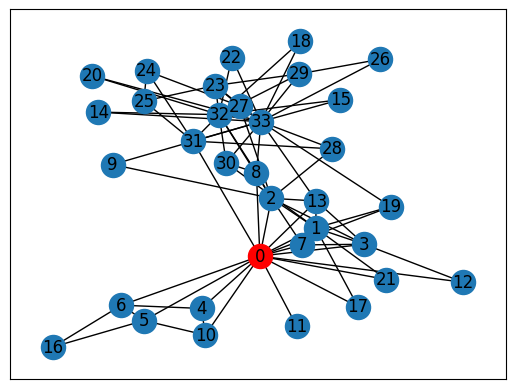

In [169]:
## Answers to Question 3
from networkx.algorithms.distance_measures import center
import numpy as np
graph = nx.read_graphml('karate_club(1).graphml', node_type=int)
# print(graph.nodes(data=True))
c = list(center(graph, weight='weight'))
print(c)
# for node in graph.nodes(data=True):
#     print(node[0], node[1]['club'])
# # same way
# for node in graph.nodes.data('club'):
#     print(node[0], node[1])

deg_centrality = nx.degree_centrality(graph)
print(sorted(deg_centrality, key=deg_centrality.get))
# print(sorted(deg_centrality))

close_centrality = nx.closeness_centrality(graph, distance='weight')
print(sorted(close_centrality, key=close_centrality.get))

bet_centrality = nx.betweenness_centrality(graph, normalized = False, 
                                              endpoints = False)
print(sorted(bet_centrality, key=bet_centrality.get))
for w in sorted(bet_centrality, key=bet_centrality.get, reverse=True):
    print(w, bet_centrality[w])
    
    
G = graph
# Get position using spring layout
pos = nx.spring_layout(G)

# Get center node(s)
c = center(G, weight='weight')
print("central", list(c))

# Draw non-central nodes & all edges
nx.draw_networkx_nodes(G, pos, nodelist=set(G.nodes)-set(c))
nx.draw_networkx_edges(G, pos)

# Draw central nodes in red
nx.draw_networkx_nodes(G, pos, nodelist=c, node_color='r')

# Draw labels
nx.draw_networkx_labels(G, pos)


In [194]:
res_oneclub = [(n, 1/nx.eccentricity(G, n, weight='weight')) for n in G.nodes if G.nodes[n]['club'] == 'Officer']
res_secondclub = [(n, 1/nx.eccentricity(G, n, weight='weight')) for n in G.nodes if G.nodes[n]['club'] != 'Officer']

for i in range(len(res_oneclub)):
    print(res_oneclub[i][0], round(res_oneclub[i][1], 2))
    
print(' ')

for i in range(len(res_secondclub)):
    print(res_secondclub[i][0], round(res_secondclub[i][1], 2))



9 0.09
14 0.09
15 0.08
18 0.09
20 0.1
22 0.08
23 0.08
24 0.1
25 0.08
26 0.09
27 0.08
28 0.1
29 0.09
30 0.09
31 0.12
32 0.09
33 0.11
 
0 0.14
1 0.11
2 0.09
3 0.11
4 0.1
5 0.1
6 0.1
7 0.11
8 0.12
10 0.11
11 0.1
12 0.12
13 0.11
16 0.08
17 0.12
19 0.12
21 0.11


In [198]:
res_oneclub = [(n, 1/nx.eccentricity(G, n, weight='weight')) for n in G.nodes if G.nodes[n]['club'] == 'Officer']
first_club_nodes = [n for n in G.nodes if G.nodes[n]['club'] != 'Officer']
subgraph = graph.subgraph(first_club_nodes)

c = list(center(subgraph, weight='weight'))
print(c)

deg_centrality = nx.degree_centrality(subgraph)
print(sorted(deg_centrality, key=deg_centrality.get))
# print(sorted(deg_centrality))

close_centrality = nx.closeness_centrality(subgraph, distance='weight', wf_improved=False)
print(sorted(close_centrality, key=close_centrality.get))

bet_centrality = nx.betweenness_centrality(subgraph, normalized = False, 
                                              endpoints = False)
print(sorted(bet_centrality, key=bet_centrality.get))
# for w in sorted(bet_centrality, key=bet_centrality.get, reverse=True):
#     print(w, bet_centrality[w])


[0]
[11, 8, 12, 16, 17, 19, 21, 4, 10, 5, 6, 7, 13, 2, 3, 1, 0]
[16, 2, 11, 5, 13, 4, 6, 3, 1, 8, 19, 21, 7, 10, 17, 12, 0]
[7, 8, 11, 12, 13, 16, 17, 19, 21, 4, 10, 2, 3, 6, 5, 1, 0]


In [209]:
teachers = [4, 24]
distances = {}
for teacher in teachers:
    distances[(teacher, 'students')] = []
    distances[(teacher, 'others')] = []
    for node in graph.nodes.items():
        key, club_name = node[0], node[1]['club']
        if club_name == graph.nodes[teacher]['club']:
            if graph.has_edge(teacher, key):
                distances[(teacher, 'students')].append(graph.get_edge_data(teacher, key)['weight'])
            else:
                distances[(teacher, 'students')].append(0)
        else:
            if graph.has_edge(teacher, key):
                distances[(teacher, 'others')].append(graph.get_edge_data(teacher, key)['weight'])
            else:
                distances[(teacher, 'others')].append(0)
for k,v in distances.items():
    print(k,np.average(v))
    
# it was wrong! should also count the weights!
# distance - the shortest path

# students - bool
def shortest_path_from_node(graph, node, students):
    distances = []
    for n in graph:
        if n == node:
            continue
        key, club_name = n, graph.nodes[n]['club']
        if (club_name == graph.nodes[teacher]['club']) == students:
            path_length = nx.shortest_path_length(graph, node, n, weight='weight')
            distances.append(path_length)
    return np.average(distances), distances

teachers = [0, 33]
distances = {}
for teacher in teachers:
        distances[(teacher, 'students')] = shortest_path_from_node(graph, teacher, True)
        distances[(teacher, 'others')] = shortest_path_from_node(graph, teacher, False)
print(distances)



(4, 'students') 0.47058823529411764
(4, 'others') 0.0
(24, 'students') 0.4117647058823529
(24, 'others') 0.0
{(0, 'students'): (2.8125, [3, 5, 3, 3, 3, 3, 2, 2, 2, 3, 1, 3, 6, 2, 2, 2]), (0, 'others'): (5.0, [5, 5, 7, 5, 4, 6, 7, 4, 6, 5, 7, 4, 5, 5, 2, 5, 3]), (33, 'students'): (3.25, [2, 2, 4, 2, 1, 3, 4, 6, 8, 2, 4, 2, 2, 3, 4, 3]), (33, 'others'): (4.647058823529412, [3, 3, 3, 6, 6, 6, 6, 5, 4, 5, 6, 4, 3, 9, 4, 1, 5])}


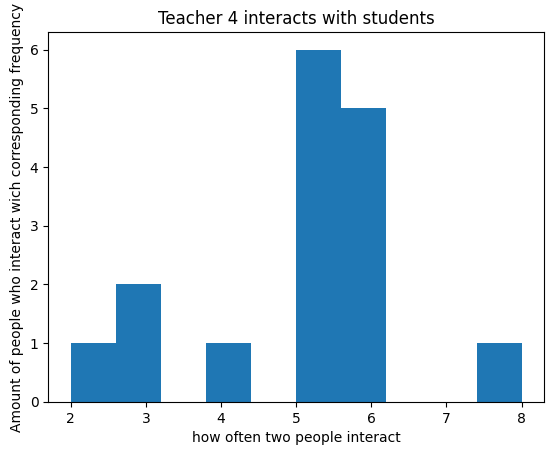

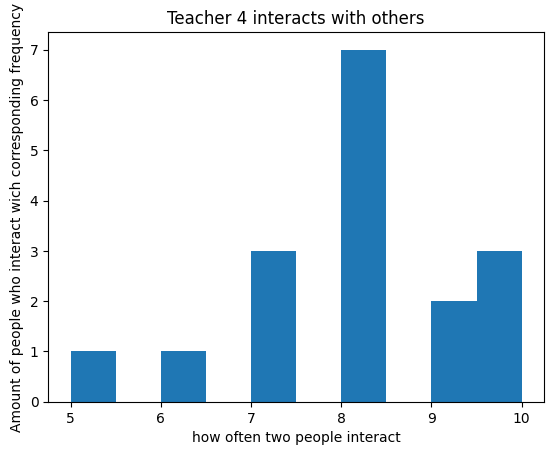

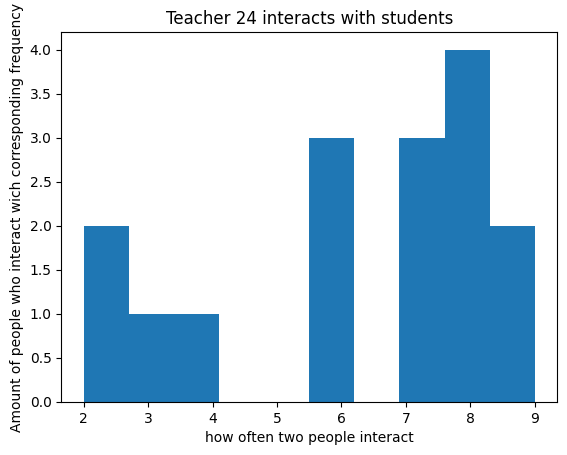

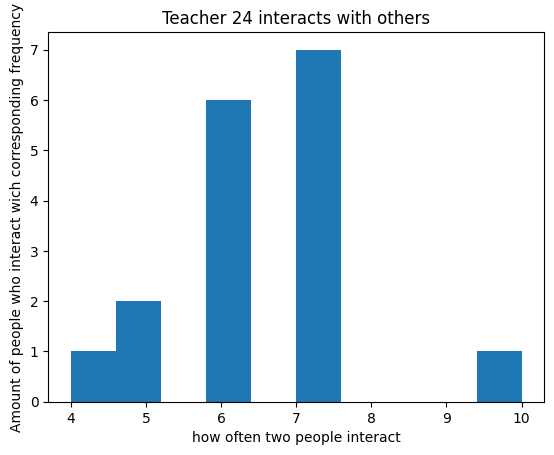

In [205]:
for k,v in distances.items():
    
    plt.hist(v[1])
    plt.title("Teacher " + str(k[0]) + ' interacts with ' + k[1])
    plt.xlabel("how often two people interact")
    plt.ylabel("Amount of people who interact wich corresponding frequency")
    plt.show()

In [218]:
# let's find members who had difficulties choosing which club to join (how?)
teachers = graph.nodes
distances = {}
for teacher in teachers:
        distances[(teacher, 'students')] = shortest_path_from_node(graph, teacher, True)
        distances[(teacher, 'others')] = shortest_path_from_node(graph, teacher, False)
# print(distances)

# for k,v in distances.items():
#     print(k,v[0])
    
for n in graph.nodes:
    diff = abs(distances[(n, 'students')][0] - distances[(n, 'others')][0])
    if diff < 0.5:
        # these members talk to the members of both clubs with almost equal frequency
        print(n , diff)

# for k,v in distances.items():
#     print(k,np.average(v))

13 0.47058823529411775
19 0.30514705882352944
24 0.16176470588235325
30 0.13602941176470562


## Question 4 (20 pt)

From Wikipedia[[1]]: "a maximum common induced subgraph of two graphs G and H is a graph that is an induced subgraph of both G and H, and that has as many vertices as possible".

Given two simple, undirected graphs $G$ and $H$ one way of finding the maximum common induced subgraph is by first constructing the *modular product graph*[[2]] $M$, and then finding all cliques in $M$. If $G$ has nodes $a, b, c, d, ...$, and H has nodes $1, 2, 3, 4, ...$ then $M$ will have as nodes all possible combinations: $V(M) = (a, 1), (a, 2), ..., (a, |H|), (b, 1), ..., (b, |H|), ..., (|G|, 1), ..., (|G|, |H|)$. $M$ will contain an edge if the edge is either in both graphs, or in neither. In other words:
Edge $((u1, v1), (u2, v2)) \in E(M)$ if either $(u1, u2) \in E(G)$ *and* $(v1, v2) \in E(H)$; or $(u1, u2) \notin E(G)$ *and* $(v1, v2) \notin E(H)$. 

For example, if $(a, b) \in E(G)$ and $(2, 6) \in E(H)$, then $((a, 2), (b, 6)) \in E(M)$. Or, if $(a, c) \notin E(G)$ and $(3, 6) \notin E(H)$ then $((a, 3), (c, 6)) \in E(M)$.

Clique(s) of $M$ will consist of nodes in $M$, which in turn correspond to nodes in $G$ and $H$. For example, if $M$ contains a clique ${(a, 3), (b, 2), (c, 1)}$ it means the induced subgraph ${a, b, c} \subseteq V(G)$ is isomorphic to the induced subgraph ${1, 2, 3} \subseteq V(H)$. It is often convenient to express this as a mapping of nodes between $G$ and $H$. In this example, the Python dictionary `{'a': 3, 'b': 2, 'c': 1}`. 

1. What is an induced subgraph? Also give an example.
2. Explain in your own words what a maximum common induced subgraph is, and give an example.
3. Explain in your own words what a modular product graph is, and give an example.
4. Implement a function to calculate the modular product graph of two given undirected graphs.
5. Implement a function to calculate the maximum common induced subgraph of two given graphs. Be sure to use an existing function to find the largest clique! If the modular product graph contains multiple largest cliques, you may choose which you use. Return the maximum common induced subgraph as a dict, described above.

[1]: https://en.wikipedia.org/wiki/Maximum_common_induced_subgraph
[2]: https://en.wikipedia.org/wiki/Modular_product_of_graphs

In [20]:
## Answers to Question 4

# --- END OF EXAM ---
Congrats, you made it to the end of the exam! Don't forget to rename your ipynb to "GTExam_YOUR_NAME_STUDENTNR.ipynb" and hand it in via BlackBoard submit!